In [23]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [24]:
# Function which takes a color channel and then apply sobel filter
def sobel_operation(channel,kernel):
  convolved_image = cv2.filter2D(channel,cv2.CV_32F,kernel)
  
  return convolved_image


In [52]:
original_image = cv2.imread("../../../data/sobelfilterimage.jpg",cv2.IMREAD_COLOR_BGR)

# Now we define a x-direction sobel filter
sobel_x = np.array([
  [-1,0,1],
  [-2,0,2],
  [-1,0,1]
])

# Now we define a y-direction sobel filter
sobel_y = np.array([
  [1,2,1],
  [0,0,0],
  [-1,-2,-1]
])

# Split the channel as (B,G,R)
b,g,r = cv2.split(original_image)

sobel_b_x = sobel_operation(b,sobel_x)
sobel_g_x = sobel_operation(g,sobel_x)
sobel_r_x = sobel_operation(r,sobel_x)

sobel_b_y = sobel_operation(b,sobel_y)
sobel_g_y = sobel_operation(g,sobel_y)
sobel_r_y = sobel_operation(r,sobel_y)



mag_b = cv2.magnitude(sobel_b_x, sobel_b_y)
mag_g = cv2.magnitude(sobel_g_x, sobel_g_y)
mag_r = cv2.magnitude(sobel_r_x, sobel_r_y)

# Merge back
mag_b_norm = cv2.normalize(mag_b, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
mag_g_norm = cv2.normalize(mag_g, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
mag_r_norm = cv2.normalize(mag_r, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

accumulated_image_colorful = cv2.merge([mag_b_norm, mag_g_norm, mag_r_norm])

# print(sobel_colored_x_image)



(np.float64(-0.5), np.float64(287.5), np.float64(383.5), np.float64(-0.5))

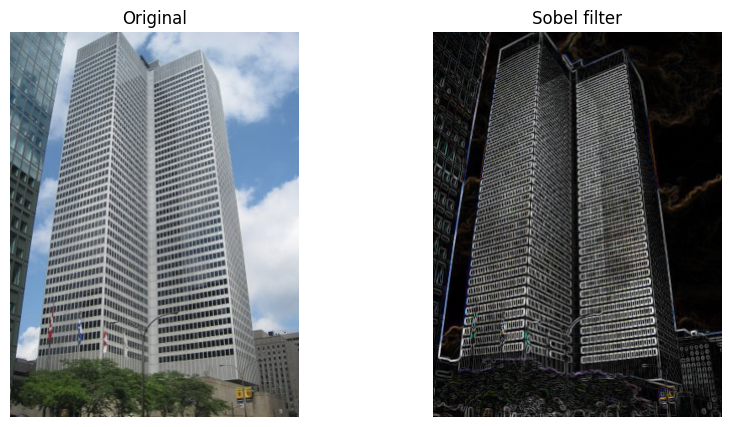

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
axes[0].set_title("Original")
axes[0].axis("off")

# render the x -image
axes[1].imshow(cv2.cvtColor(accumulated_image_colorful, cv2.COLOR_BGR2RGB))
axes[1].set_title("Sobel filter")
axes[1].axis("off")

# # render the y-image
# axes[2].imshow(cv2.cvtColor(sobel_colored_y_image, cv2.COLOR_BGR2RGB))
# axes[2].set_title("Sobel filter applied in y-axis")
# axes[2].axis("off")

# # render the accumulated image
# axes[3].imshow(cv2.cvtColor(accumulated_image.astype(np.uint8), cv2.COLOR_BGR2RGB))
# axes[3].set_title("Sobel filter applied in both axis")
# axes[3].axis("off")
# plt.show()